In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

In [2]:
bin_path = "/home/cjkeerthana/Documents/Parallel_Programming/ParallelProgramming/Ex5/MPI_FileDump/out"
dat_path = "/home/cjkeerthana/Documents/Parallel_Programming/ParallelProgramming/Ex5/MPI_FileDump/out_dat"
os.listdir(bin_path)
os.listdir(dat_path)

['2000', '4000', '6000', '10000', '8000']

In [3]:
def read_text_file(file_path):
    with open(file_path, 'r') as f:
        time = 0
        for line in f.readlines():
                t = re.findall(r"[-+]?\d*\.\d+|\d+", line)
                time = time + float(t[1])
        return time

In [4]:
def read_all_times(dir_path):
    times = []
    for file in os.listdir(dir_path):
    # Check whether file is in text format or not
        if file.endswith(".txt"):
            file_path = dir_path + "/" + file 
            name = file.split("_")
            avg_time = read_text_file(file_path)
            avg_time = avg_time/int(name[0])
            times.append((int(name[0]),avg_time))
    times.sort()
    procs = []
    tempo = []
    for e in times:
        a,b = e
        procs.append(a)
        tempo.append(b)
    return tempo

In [8]:
def separate_times(totTime, commTime, calcTime, dumpTime):
    totTime = np.asarray(totTime)
    commTime = np.asarray(commTime)
    calcTime = np.asarray(calcTime)
    commTime = commTime - calcTime
    calcTime = totTime - dumpTime - commTime
    return totTime,commTime,calcTime,dumpTime

In [31]:
def make_plots_times(title, labels, commTime, calcTime, dumpTime):
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars
    fig, ax = plt.subplots(figsize=(20, 10))
    #rects1 = ax.bar(x, commTime, width, label='CommTime')
    rects2 = ax.bar(x, calcTime, width, bottom= dumpTime, label='CalcTime')
    rects3 = ax.bar(x, dumpTime, width, label='DumpTime')
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Time')
    ax.set_xlabel('procs')
    ax.set_title(title ) 
    ax.set_xticks(x)
    ax.legend()
    ax.set_xticklabels(labels)

    fig.tight_layout()

    plt.show()

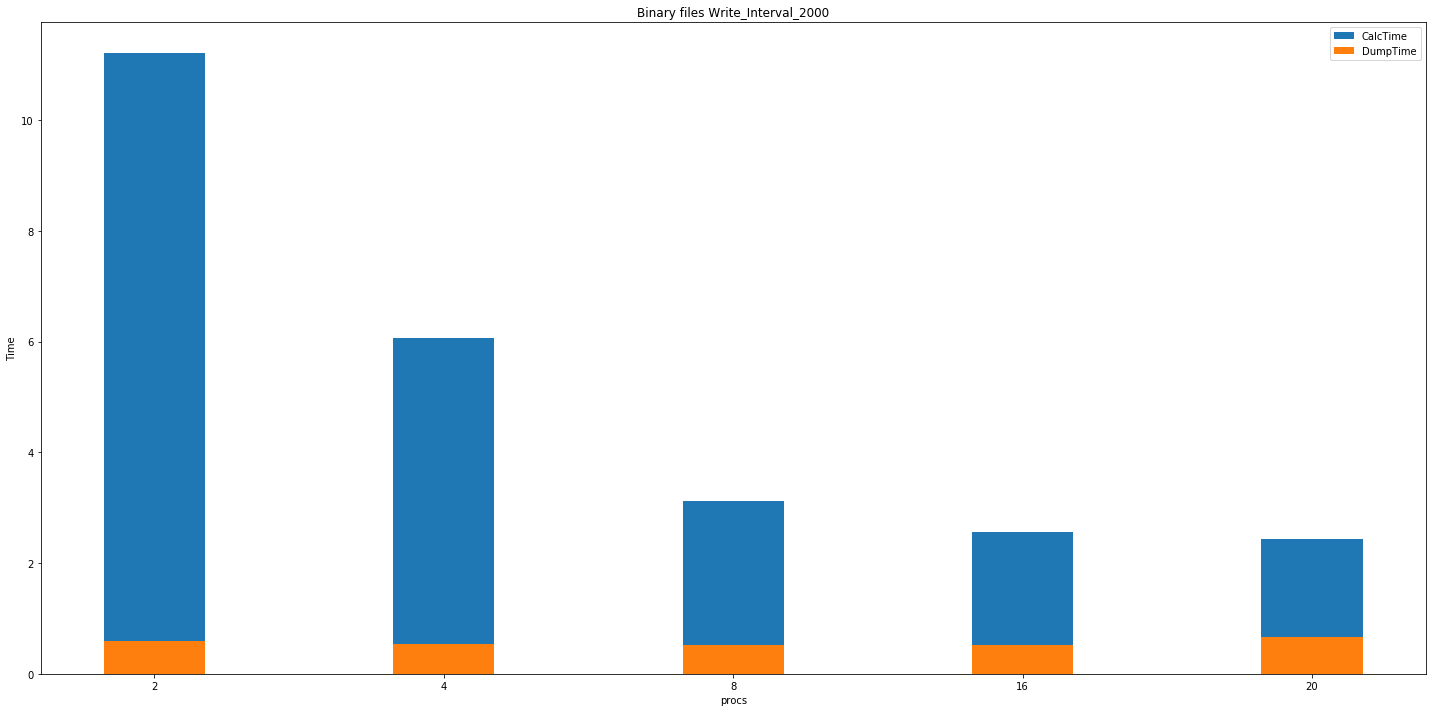

In [39]:
commTime = read_all_times(bin_path + "/500/commTime")
totTime = read_all_times(bin_path + "/500/totTime")
calcTime = read_all_times(bin_path + "/500/calcTime")
dumpTime = read_all_times(bin_path + "/500/dumpTime")
totTime, commTime, calcTime, dumpTime = separate_times(totTime, commTime, calcTime, dumpTime)
labels = ["2","4","8","16","20"]
procs = np.asarray([2,4,8,16,20])
title = "Binary files Write_Interval_2000"
make_plots_times(title,labels,commTime,calcTime, dumpTime)

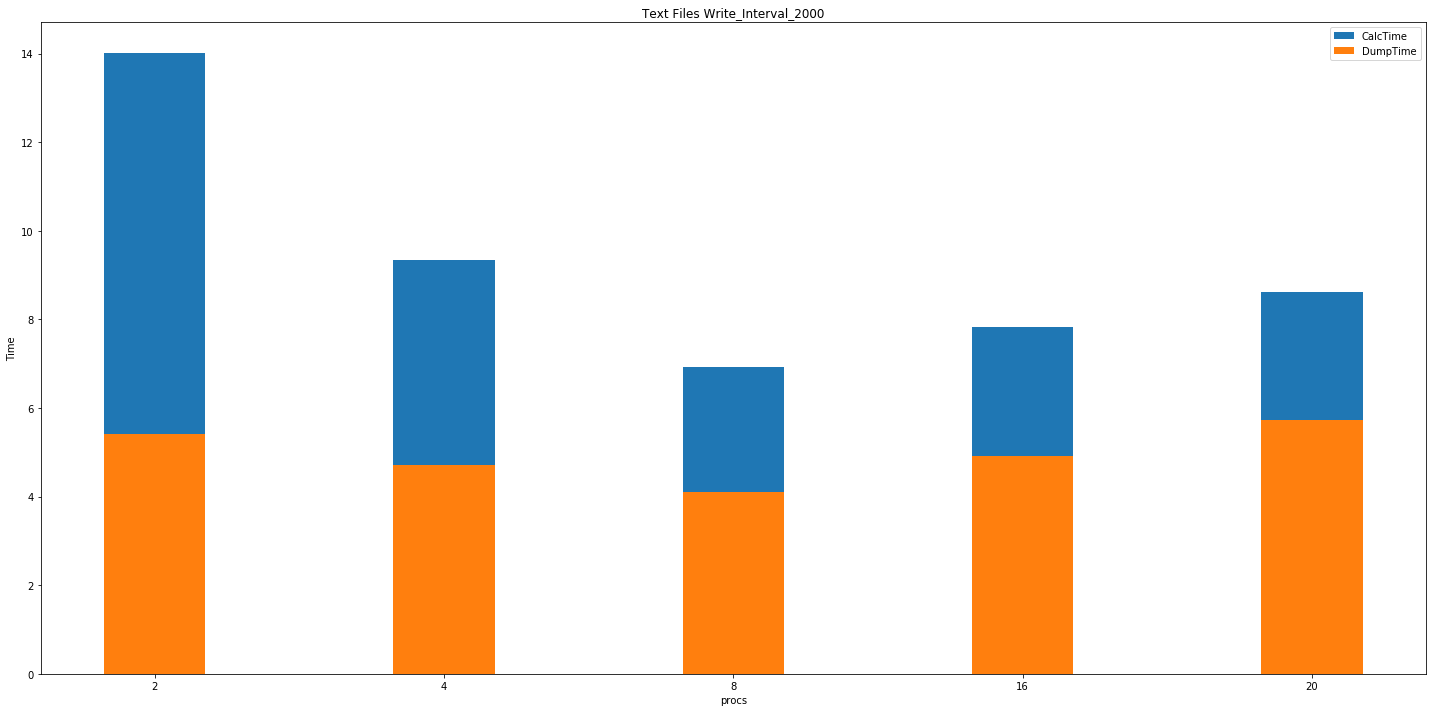

In [40]:
commTime = read_all_times(dat_path + "/2000/commTime")
totTime = read_all_times(dat_path + "/2000/totTime")
calcTime = read_all_times(dat_path + "/2000/calcTime")
dumpTime = read_all_times(dat_path + "/2000/dumpTime")
totTime, commTime, calcTime, dumpTime = separate_times(totTime, commTime, calcTime, dumpTime)
labels = ["2","4","8","16","20"]
procs = np.asarray([2,4,8,16,20])
title = "Text Files Write_Interval_2000"
make_plots_times(title,labels,commTime,calcTime, dumpTime)

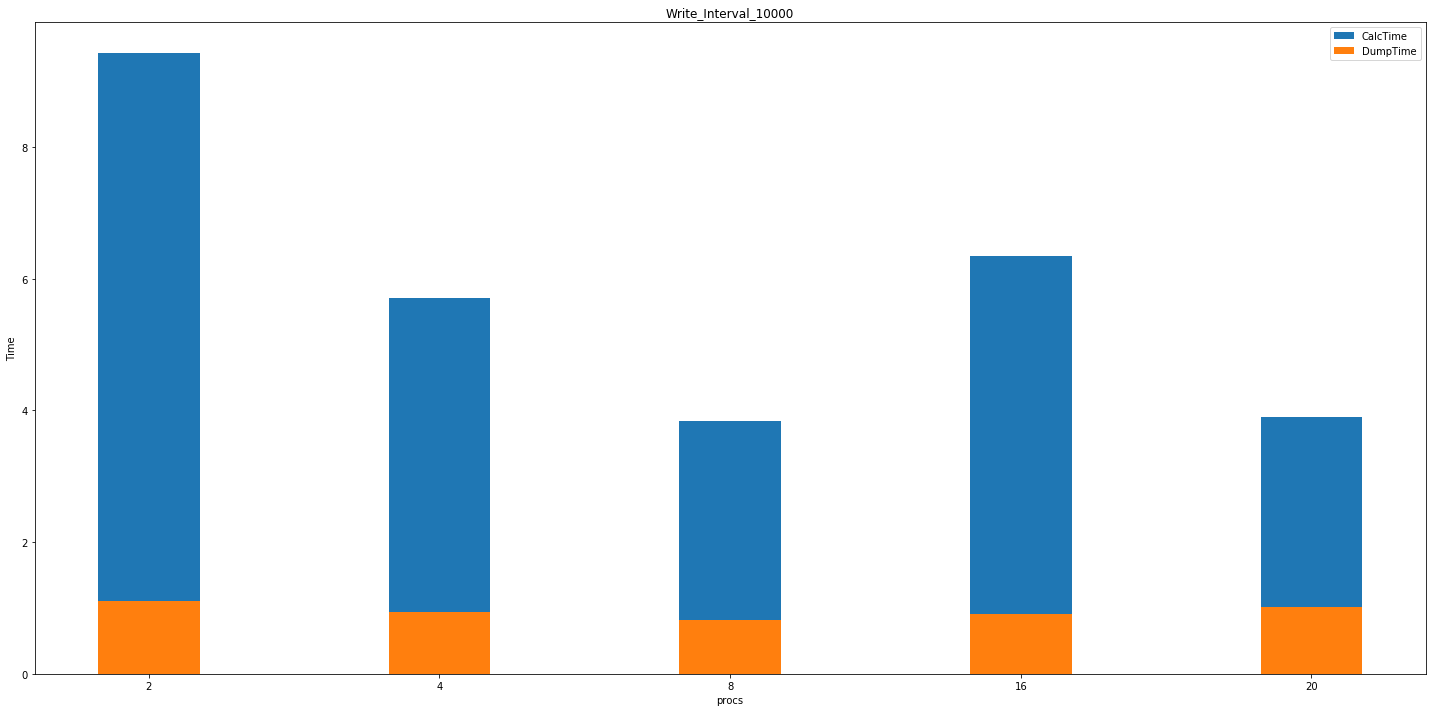

In [36]:
commTime = read_all_times(dat_path + "/10000/commTime")
totTime = read_all_times(dat_path + "/10000/totTime")
calcTime = read_all_times(dat_path + "/10000/calcTime")
dumpTime = read_all_times(dat_path + "/10000/dumpTime")
totTime, commTime, calcTime, dumpTime = separate_times(totTime, commTime, calcTime, dumpTime)
labels = ["2","4","8","16","20"]
procs = np.asarray([2,4,8,16,20])
title = "Text Files Write_Interval_10000"
make_plots_times(title,labels,commTime,calcTime, dumpTime)